In [1]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

import models
from maneuvers import Maneuvers
from constants import constants
import auxiliary

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [4]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+500e3
ra = constants.Re+501e3
Omega = 30*np.pi/180
i = 2*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = models.Cubesat("3U")

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("J2")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Wall time: 619 ms


<IPython.core.display.Javascript object>


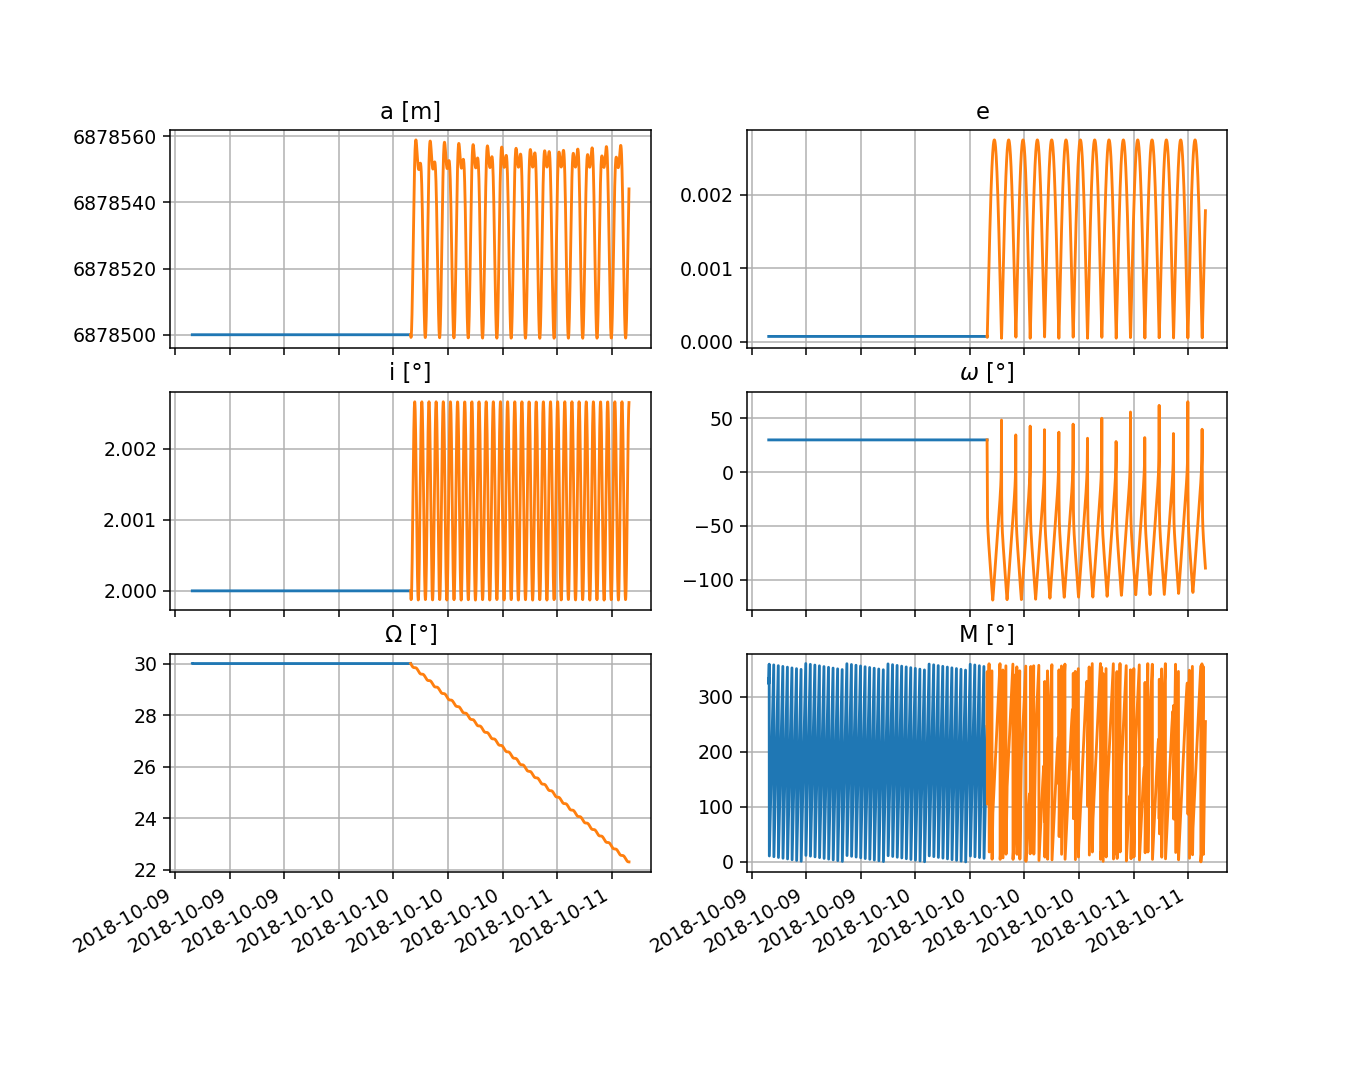

<IPython.core.display.Javascript object>


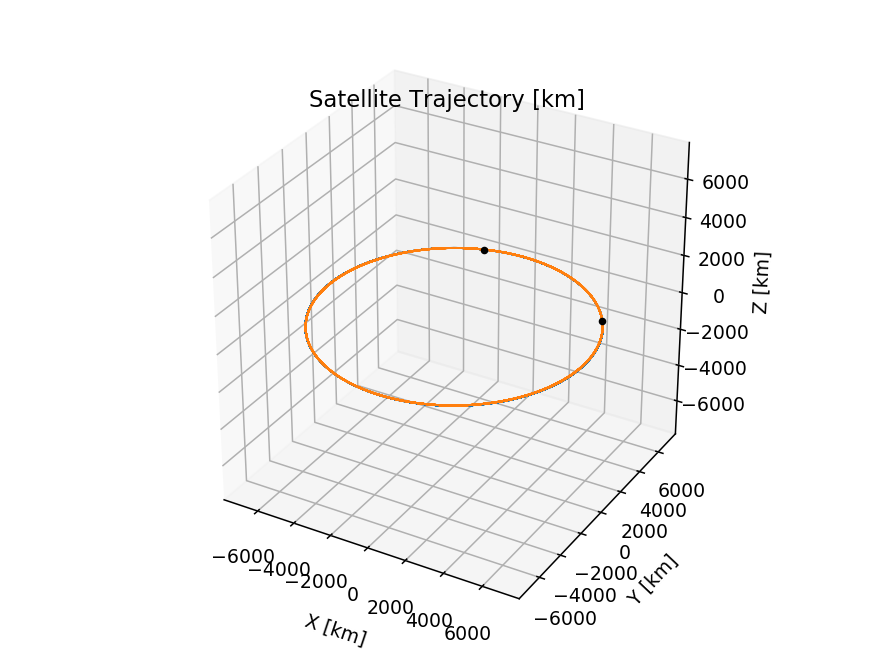

In [5]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
maneuvers.plot("com")
#Plot 3D Trajectory
maneuvers.plot("3d-trajectory")

## Solar Pressure

In [6]:
# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("solar_pressure")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Wall time: 560 ms


<IPython.core.display.Javascript object>


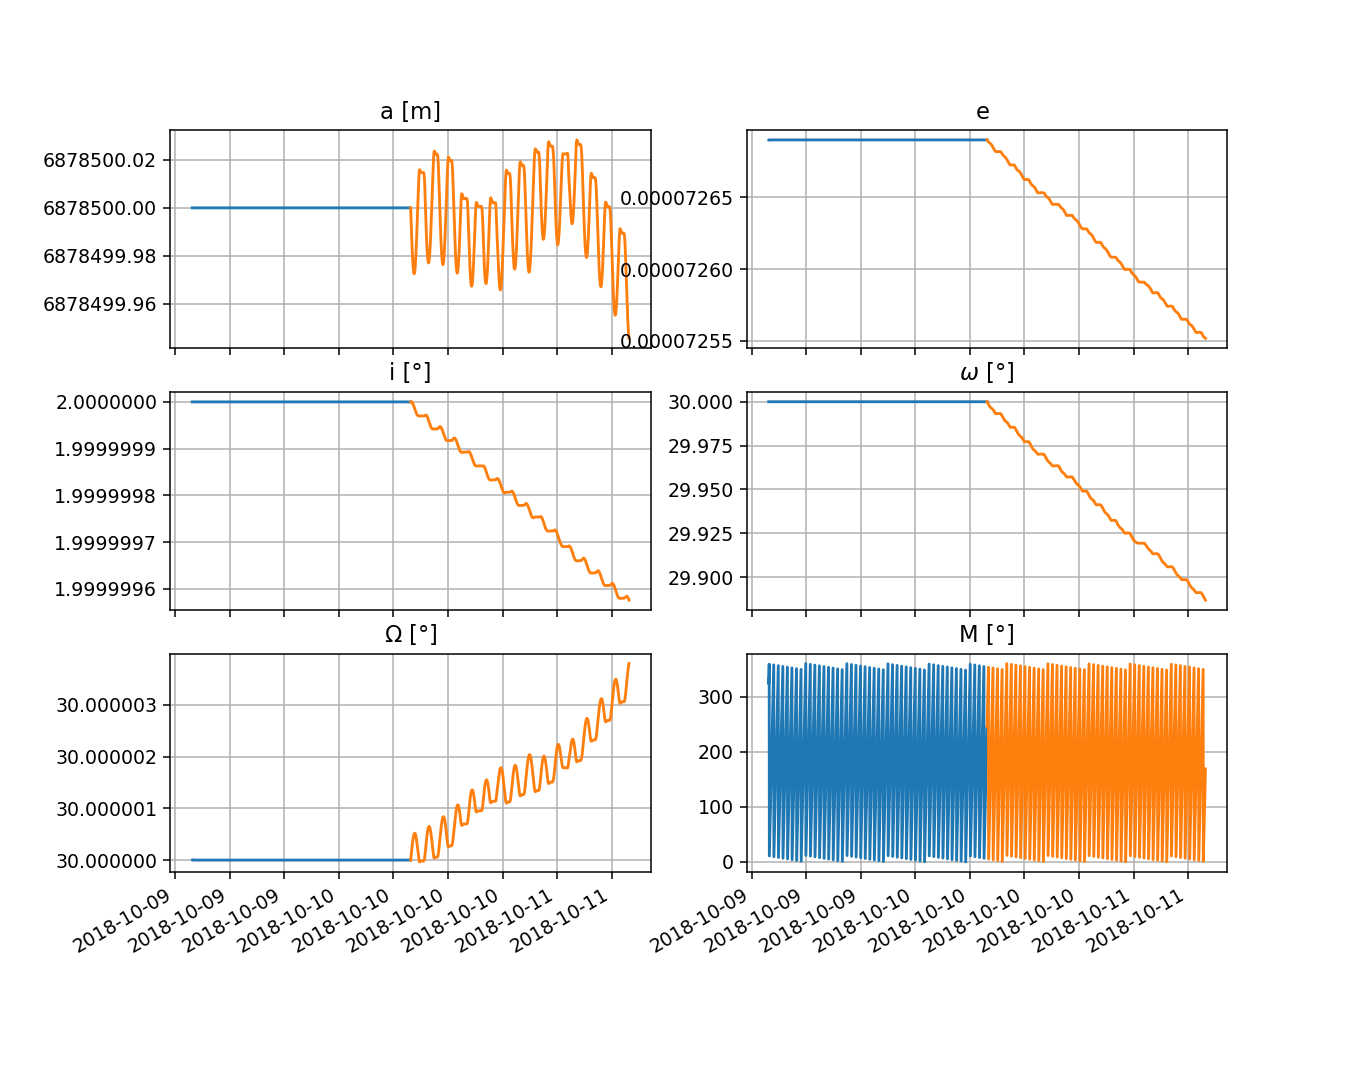

In [7]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
maneuvers.plot("com")

## Moon's Gravity

In [8]:
# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("moon_gravity")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Wall time: 419 ms


<IPython.core.display.Javascript object>


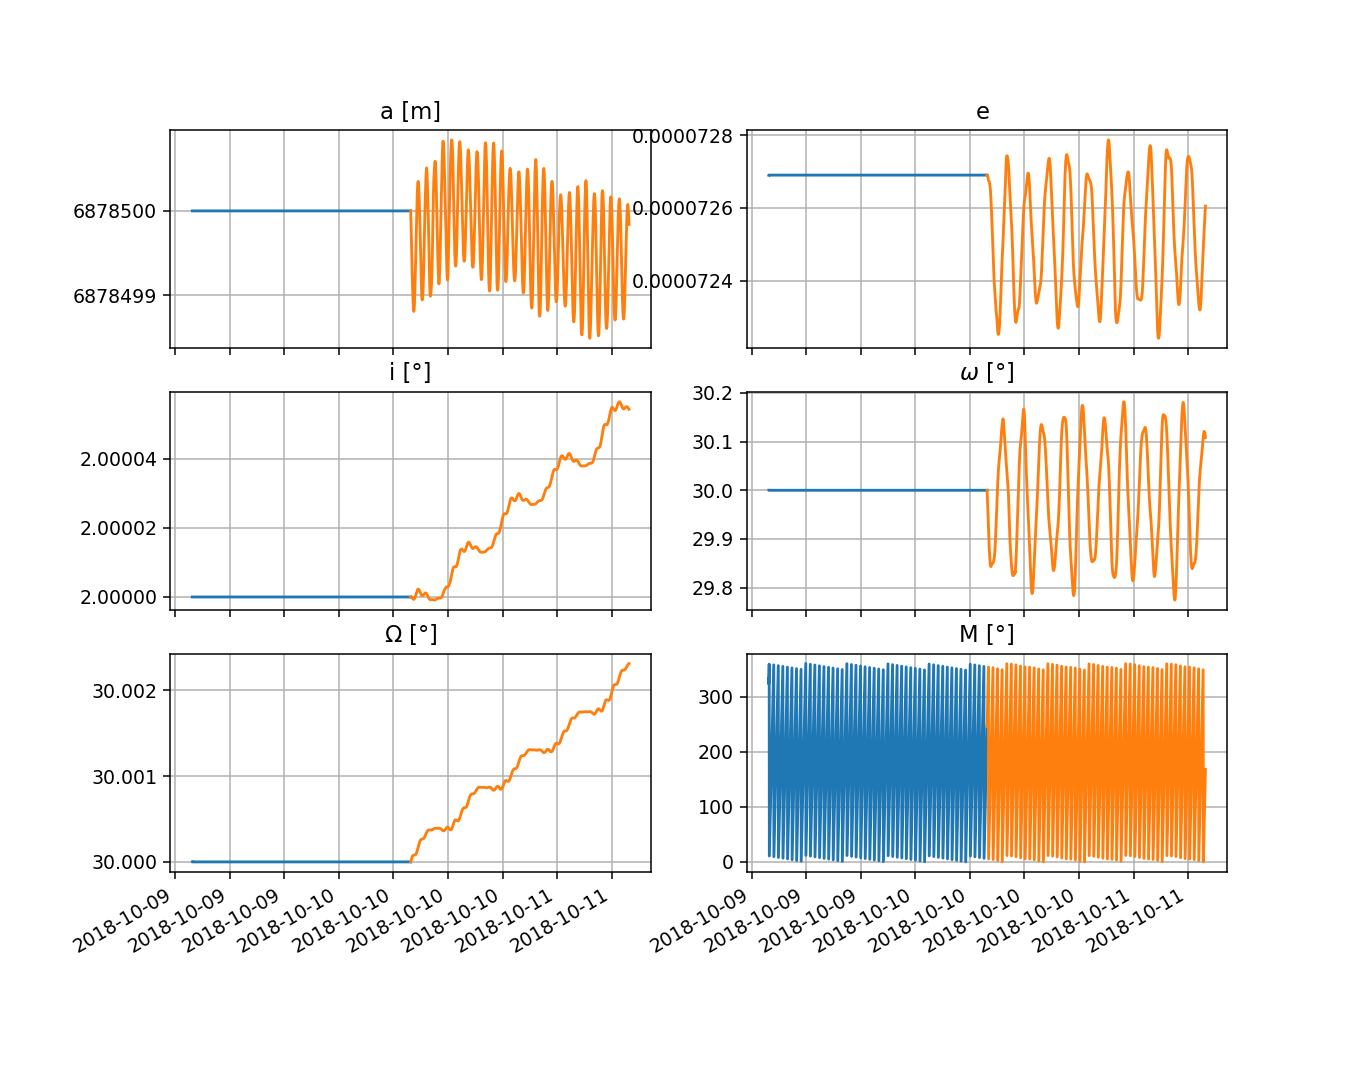

In [9]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
maneuvers.plot("com")